### Twitter US Airline Sentiment EDA

`News`: Twitter has been rebranded as `X`

### Objective: To predict category for the `sentiment of tweets` into three categories: `positive`, `negative` and `neutral`

### Data Description:

- `Source`: `Twitter` -- coming from a project on Kaggle
    
    
- `Description:` -- Passengers tweets about airline performance, having sentiments about their journey`

In [1]:
!pip install contractions 
!pip install string

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import contractions 
import string
import unicodedata

from bs4 import BeautifulSoup

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
from wordcloud import WordCloud, STOPWORDS

In [5]:
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df.sample(3).T

,13752,5989,13540
tweet_id,569727135717281792,568443115415035904,569837685428359168
airline_sentiment,negative,positive,negative
airline_sentiment_confidence,1.0,1.0,1.0
negativereason,Cancelled Flight,NaN,Customer Service Issue
negativereason_confidence,1.0,NaN,1.0
airline,American,Southwest,American
airline_sentiment_gold,NaN,NaN,NaN
name,urduckcommander,rachael_rhanna,thelyandre
negativereason_gold,NaN,NaN,NaN
retweet_count,0,0,0


In [7]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
df.duplicated().sum()

36

In [9]:
df.drop_duplicates(inplace=True)

#### `Percentage of tweets` for each airline

In [10]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [11]:
print("Total number of Tweets:", df['text'].count())

Total number of Tweets: 14604


In [12]:
tweet_summ = df.groupby('airline').agg(
 count_tweets = ('text', 'count')).reset_index()
tweet_summ['Total Tweets'] = tweet_summ['count_tweets'].sum()
tweet_summ['% Tweets'] = tweet_summ['count_tweets']/tweet_summ['Total Tweets']*100
tweet_summ

,airline,count_tweets,Total Tweets,% Tweets
0,American,2723,14604,18.645577
1,Delta,2222,14604,15.215010
2,Southwest,2420,14604,16.570803
3,US Airways,2913,14604,19.946590
4,United,3822,14604,26.170912
5,Virgin America,504,14604,3.451109


- As we can see the %age  of tweets for `United` airline has the highest (**26.1%**), followed by `US Airways` (**~20%**)

- However its the total tweets by airline not by `sentiment category`

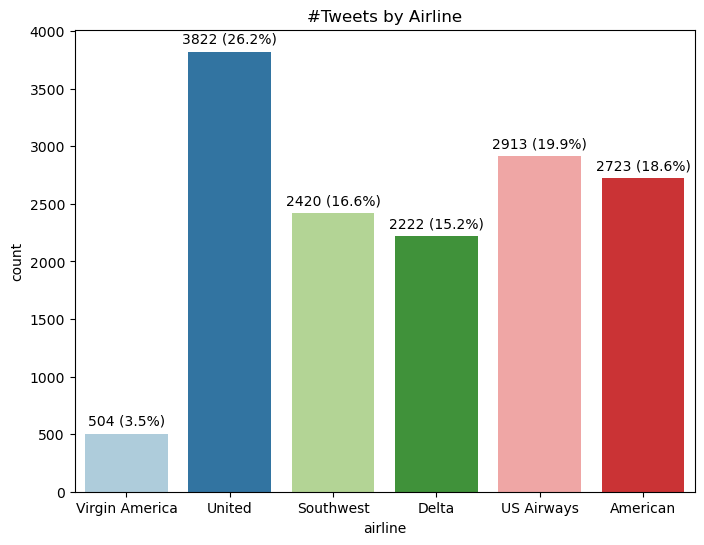

In [13]:
totalDatas = df['airline'].count()
plt.subplots(figsize=(8,6))
ax = sns.countplot(data = df, x='airline', palette = 'Paired')
# Annotations
for p in ax.patches:
    eachCount = format(p.get_height(), '.0f')
    percentage = format ((p.get_height() / totalDatas) * 100, '.1f')
    text = eachCount + ' (' + percentage + '%)'
    ax.annotate(text, (p.get_x() + (p.get_width()/2), p.get_height()), ha='center',xytext=(0, 6), textcoords='offset points')

plt.title("#Tweets by Airline")
plt.show()

### `Distribution of Sentiments` across all the tweets for all the airlines

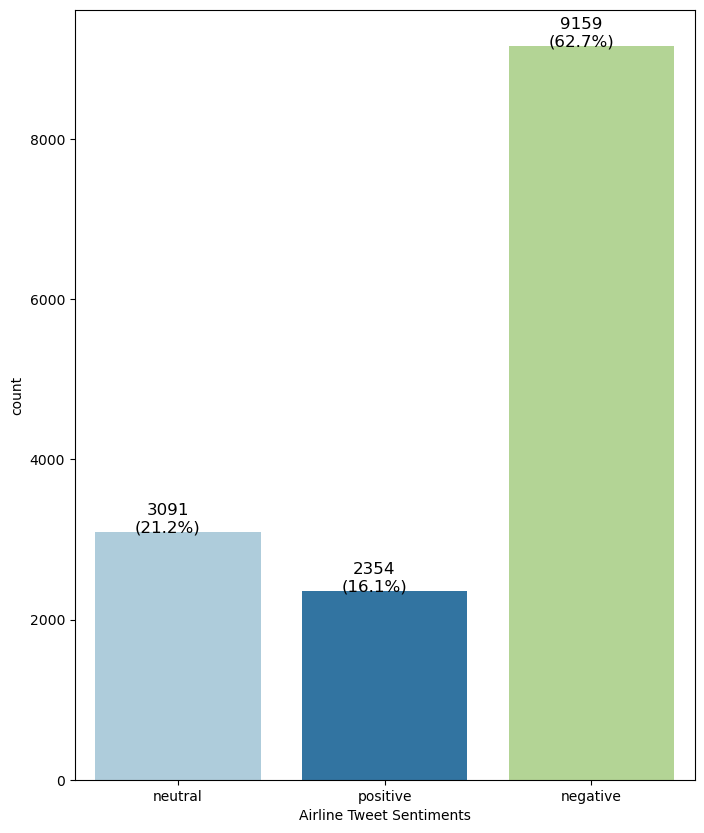

In [14]:
plt.subplots(figsize=(8, 10))
ax = sns.countplot(
    data=df,
    x='airline_sentiment',
    palette='Paired'
)

total = len(df)

for p in ax.patches:
    count = int(p.get_height())  
    percentage = f'{100 * count / total:.1f}%' 
    x = p.get_x() + p.get_width() / 2 - 0.05  
    y = p.get_height() + 0.5 
    ax.annotate(f'{count}\n({percentage})', (x, y), size=12, ha='center')  
plt.xlabel('Airline Tweet Sentiments')
plt.show()

- **Majority of the tweets are negative `(63%)`, followed by neutral tweets (21%), and then the positive tweets (16%)**

- Its common for people to get on `Twitter (now X)` and rant about bad **customer service**

### `Distribution of Sentiments' categories by Airline` across all the tweets

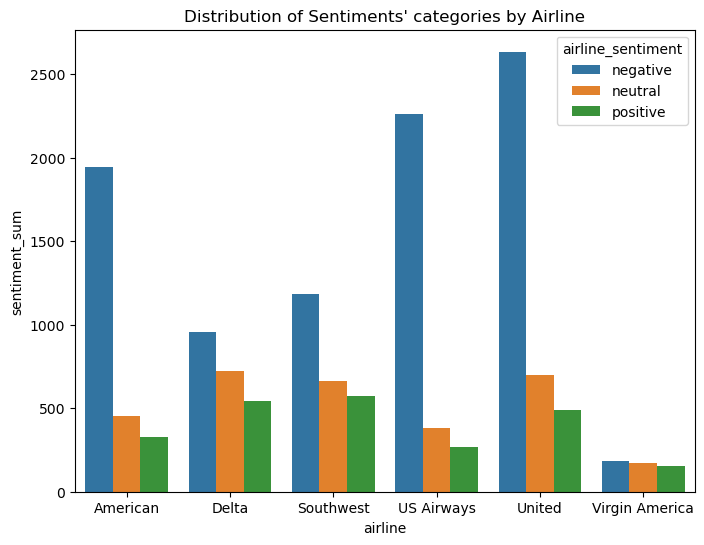

In [15]:
sentiment__by_airline=df.groupby(['airline','airline_sentiment']).agg(
 sentiment_sum=('airline_sentiment','count')
).reset_index()
plt.subplots(figsize=(8,6))
sns.barplot(data=sentiment__by_airline,
            x='airline',
            y='sentiment_sum',
            hue='airline_sentiment')
plt.title("Distribution of Sentiments' categories by Airline")
plt.show()

- **Majority of the negative tweets(63%) are coming for `United` & `US Airways`**

- `Virgin America` airline is probably the only airline where the ratio of **three sentiment categories is somewhat similar** however they are the smallest airline company

- `Delta` & `Southwest` airlines have relatively **less negative tweets** in proportion compared to others

### Let us focus on `negative tweets` and plot all negative reasons

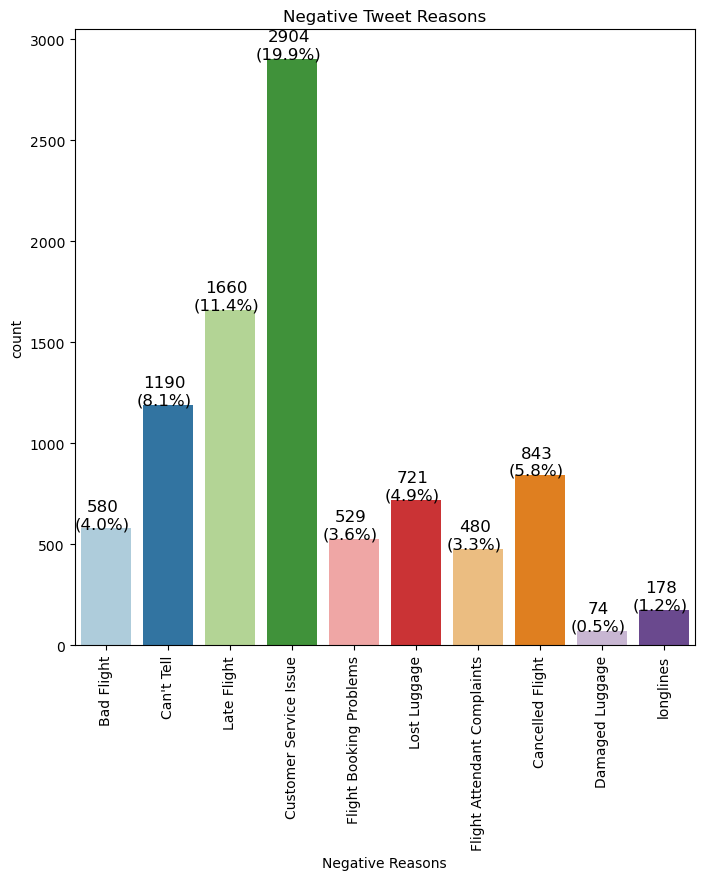

In [16]:
plt.subplots(figsize = (8,8))

ax = sns.countplot(data = df, x='negativereason', palette = 'Paired')

total = len(df['negativereason'])

for p in ax.patches:
    count = int(p.get_height())  
    percentage = f'{100 * count / total:.1f}%' 
    x = p.get_x() + p.get_width() / 2 - 0.05  
    y = p.get_height() + 0.5 
    ax.annotate(f'{count}\n({percentage})', (x, y), size=12, ha='center')  

plt.xticks(rotation = 90)
plt.xlabel('Negative Reasons')
plt.title('Negative Tweet Reasons')
plt.show()

- `Customer service` is the top reason for negative sentiments

In [17]:
filter_neg_reason = df['negativereason'] == 'Customer Service Issue'
df[filter_neg_reason]['text'].tolist()[:4]

['@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet',
 "@VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response.",
 '@VirginAmerica help, left expensive headphones on flight 89 IAD to LAX today. Seat 2A. No one answering L&amp;F number at LAX!',
 '@VirginAmerica awaiting my return phone call, just would prefer to use your online self-service option :(']

In [18]:
filter_neg_reason = df['negativereason'] == "Can't Tell"
df[filter_neg_reason]['text'].tolist()[:4]

["@VirginAmerica and it's a really big bad thing about it",
 "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 '@VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select???',
 "@VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat anything for next 6 hrs #fail"]

### `word cloud` for `negative tweets`

(9159, 15)


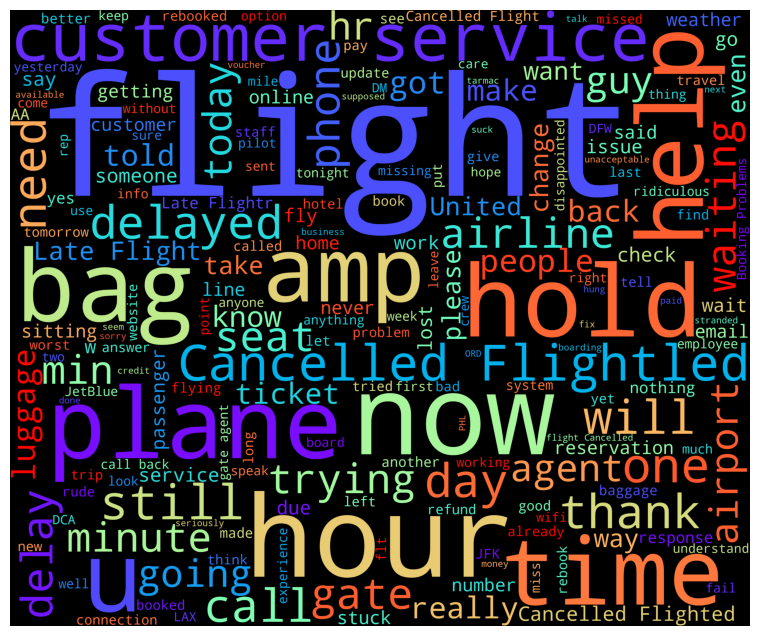

In [19]:
neg_df = df[df['airline_sentiment']=='negative']
print(neg_df.shape)

words = ' '.join(neg_df['text'])
cleaned_text = " ".join([word for word in words.split() #split the text into words
                        if 'http' not in word #filter out any word that contains 'http'
                        and not word.startswith('@') # or start with @ and
                        and word !='RT' # retweets
                        ])
wordcloud = WordCloud(stopwords = STOPWORDS, #exclude common stopwords
                     background_color='black',
                     width = 3000,
                     height = 2500,
                     colormap = 'rainbow',
                     ).generate(cleaned_text)
plt.subplots(figsize = (12,8))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### `word cloud` for `positive tweets`

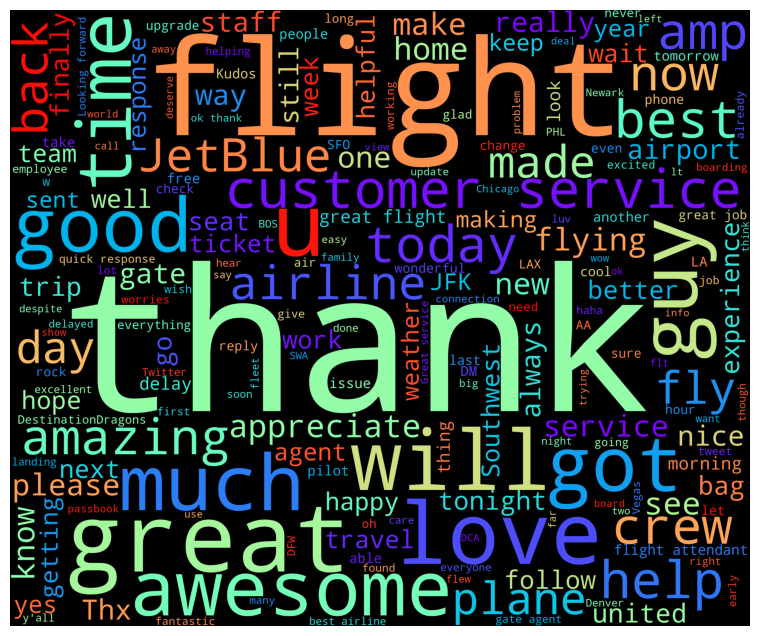

In [20]:
pos_df = df[df['airline_sentiment']=='positive'] #filter out for positive tweets
words = ' '.join(pos_df['text']) 
cleaned_text = " ".join([word for word in words.split() #split the text into words
                        if 'http' not in word #filter out any word that contains 'http'
                        and not word.startswith('@') # or start with @ and
                        and word !='RT' # retweets
                        ])
wordcloud = WordCloud(stopwords=STOPWORDS,  # excludes common stopwords
                      background_color='black',
                      width=3000,
                      height=2500,
                      colormap = 'rainbow'
                     ).generate(cleaned_text)
plt.subplots(figsize = (12,8))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### `word cloud` for `neutral tweets`

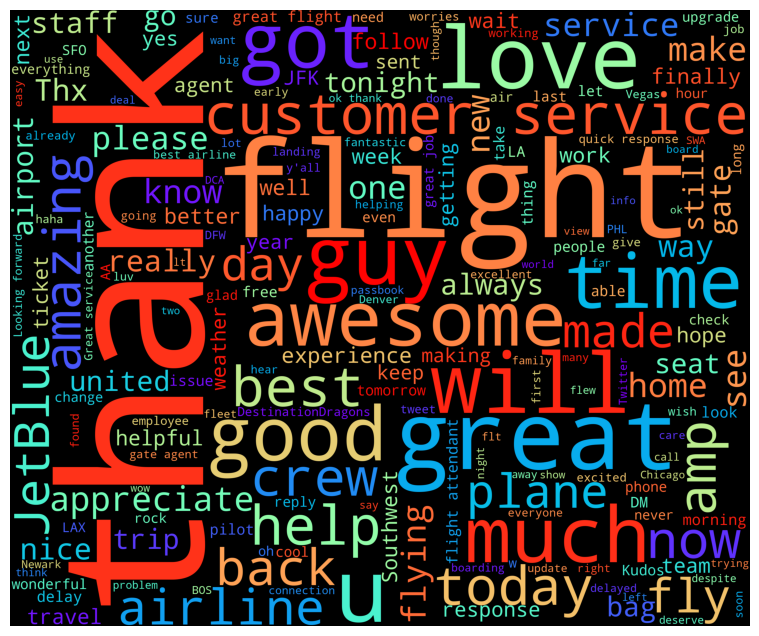

In [21]:
neutral_df = df[df['airline_sentiment']=='positive'] #filter out for positive tweets
words = ' '.join(neutral_df['text']) 
cleaned_text = " ".join([word for word in words.split() #split the text into words
                        if 'http' not in word #filter out any word that contains 'http'
                        and not word.startswith('@') # or start with @ and
                        and word !='RT' # retweets
                        ])
wordcloud = WordCloud(stopwords=STOPWORDS,  # excludes common stopwords
                      background_color='black',
                      width=3000,
                      height=2500,
                      colormap = 'rainbow'
                     ).generate(cleaned_text)
plt.subplots(figsize = (12,8))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()